In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [113]:
import seaborn as sns

In [3]:
!ls /stelmo/mcoulter/david905/filterframework

david905ca1rippleskons01.mat  david905pos01.mat     david905tetinfo.mat
david905DIO01.mat	      david905rawpos01.mat  EEG
david905marks01.mat	      david905task01.mat


In [5]:
from src.parameters import ANIMALS
from loren_frank_data_processing import make_epochs_dataframe

epoch_info = make_epochs_dataframe(ANIMALS)
epoch_info

,,,environment,type,exposure
animal,day,epoch,,,
david905,1,1,run,run,1


In [6]:
epoch_key = ("david905", 1, 1)

In [10]:
from loren_frank_data_processing.core import get_data_structure
import pandas as pd


def _get_pos_dataframe(epoch_key, animals):
    animal, day, epoch = epoch_key
    struct = get_data_structure(animals[animal], day, "pos", "pos")[epoch - 1]
    position_data = struct["data"][0, 0]
    FIELD_NAMES = [
        "time",
        "x_position",
        "y_position",
        "head_direction",
        "speed",
        "smoothed_x_position",
        "smoothed_y_position",
        "smoothed_head_direction",
        "smoothed_speed",
    ]
    time = pd.TimedeltaIndex(position_data[:, 0], unit="s", name="time")
    n_cols = position_data.shape[1]

    if n_cols > 5:
        # Use the smoothed data if available
        NEW_NAMES = {
            "smoothed_x_position": "x_position",
            "smoothed_y_position": "y_position",
            "smoothed_head_direction": "head_direction",
            "smoothed_speed": "speed",
        }
        return pd.DataFrame(
            position_data[:, 5:9], columns=FIELD_NAMES[5:9], index=time
        ).rename(columns=NEW_NAMES)
    else:
        return pd.DataFrame(position_data[:, 1:5], columns=FIELD_NAMES[1:5], index=time)

In [67]:
position_info = _get_pos_dataframe(epoch_key, ANIMALS)
position_info

,x_position,y_position,head_direction,speed
time,,,,
0 days 00:00:00.743733333,136.803980,109.544717,NaN,1.859527
0 days 00:00:00.774121459,136.795561,109.525157,NaN,3.322813
0 days 00:00:00.804509484,136.771205,109.443473,NaN,4.543484
0 days 00:00:00.834897509,136.730002,109.309009,NaN,5.519771
0 days 00:00:00.865285634,136.666572,109.128485,NaN,6.291531
...,...,...,...,...
0 days 02:21:12.933453512,119.026583,113.569583,NaN,42.575427
0 days 02:21:12.963841624,119.582885,112.340258,NaN,46.591417
0 days 02:21:12.994229636,120.213505,110.978282,NaN,50.604636


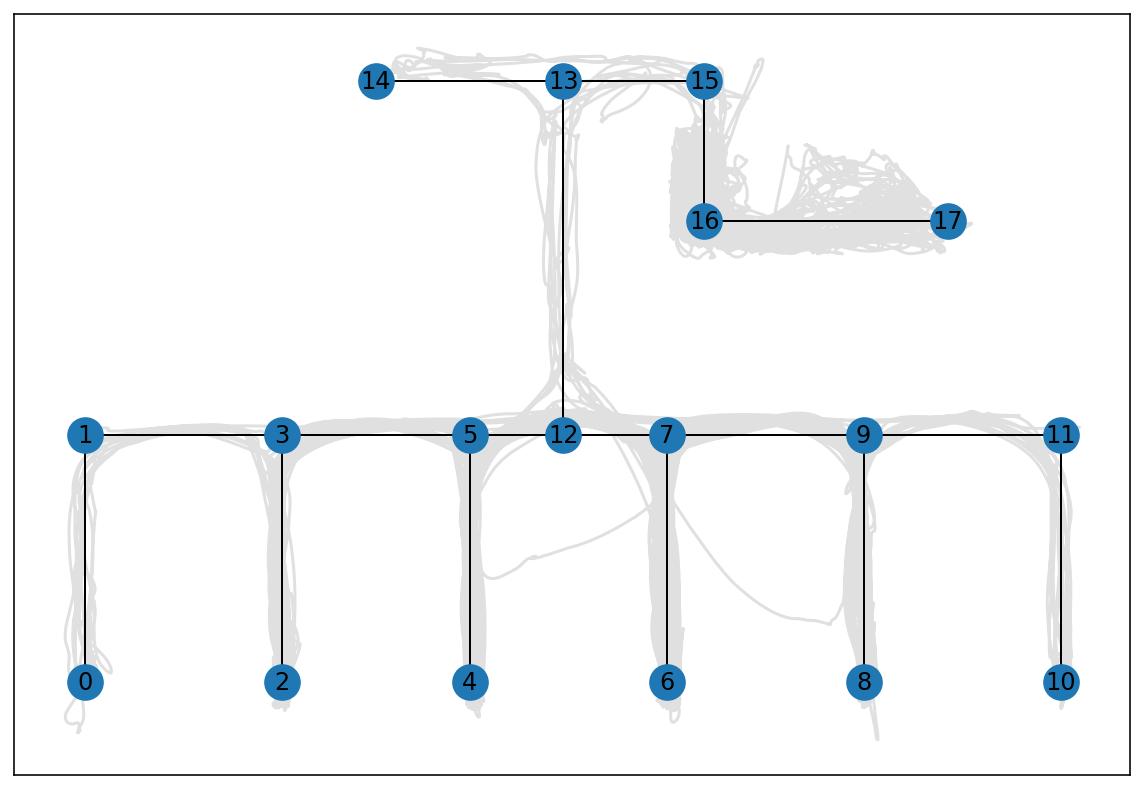

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from track_linearization import plot_track_graph
from src.load_data import get_track_graph

plt.figure(figsize=(10, 7))
plt.plot(
    position_info.x_position,
    position_info.y_position,
    color="lightgrey",
    alpha=0.7,
    zorder=-1,
)

track_graph = get_track_graph()

plot_track_graph(track_graph)

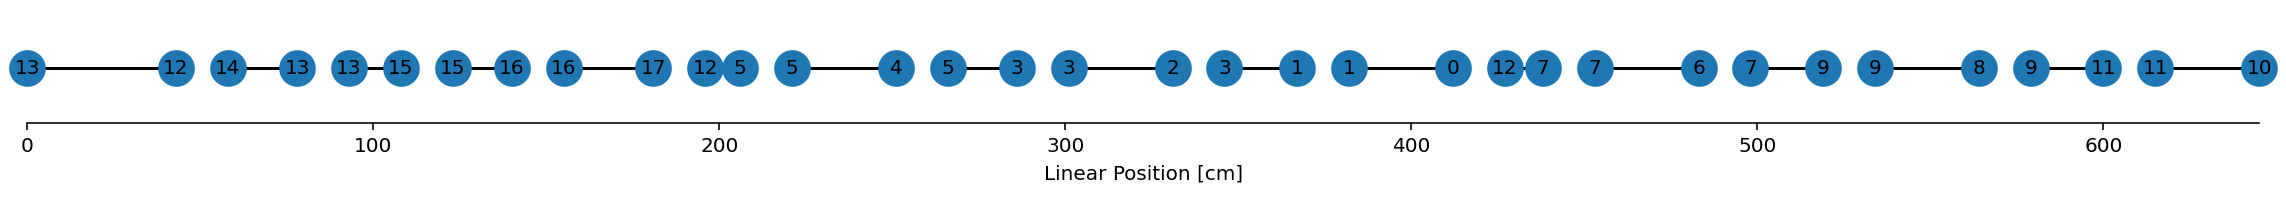

In [102]:
from track_linearization import plot_graph_as_1D
from src.parameters import EDGE_ORDER, EDGE_SPACING

fig, ax = plt.subplots(1, 1, figsize=(20, 1))
plot_graph_as_1D(track_graph, EDGE_ORDER, EDGE_SPACING)

In [107]:
from src.load_data import get_interpolated_position_info

position_info = get_interpolated_position_info(epoch_key, ANIMALS)
position_info

,x_position,y_position,head_direction,speed,linear_position,track_segment_id,projected_x_position,projected_y_position
time,,,,,,,,
0 days 00:00:00.743733333,136.803980,109.544717,NaN,1.859527,174.803980,16,136.803980,110.0
0 days 00:00:00.745733333,136.803419,109.543413,NaN,1.957079,174.803419,16,136.803419,110.0
0 days 00:00:00.747733333,136.802858,109.542109,NaN,2.054632,174.802858,16,136.802858,110.0
0 days 00:00:00.749733333,136.802296,109.540805,NaN,2.152184,174.802296,16,136.802296,110.0
0 days 00:00:00.751733333,136.801735,109.539501,NaN,2.249737,174.801735,16,136.801735,110.0
...,...,...,...,...,...,...,...,...
0 days 02:21:13.045733333,121.469288,108.493322,NaN,55.256967,159.469288,16,121.469288,110.0
0 days 02:21:13.047733333,121.519268,108.399049,NaN,55.335842,159.519268,16,121.519268,110.0
0 days 02:21:13.049733333,121.569248,108.304776,NaN,55.414718,159.569248,16,121.569248,110.0


(0.743733333, 8473.053733333)

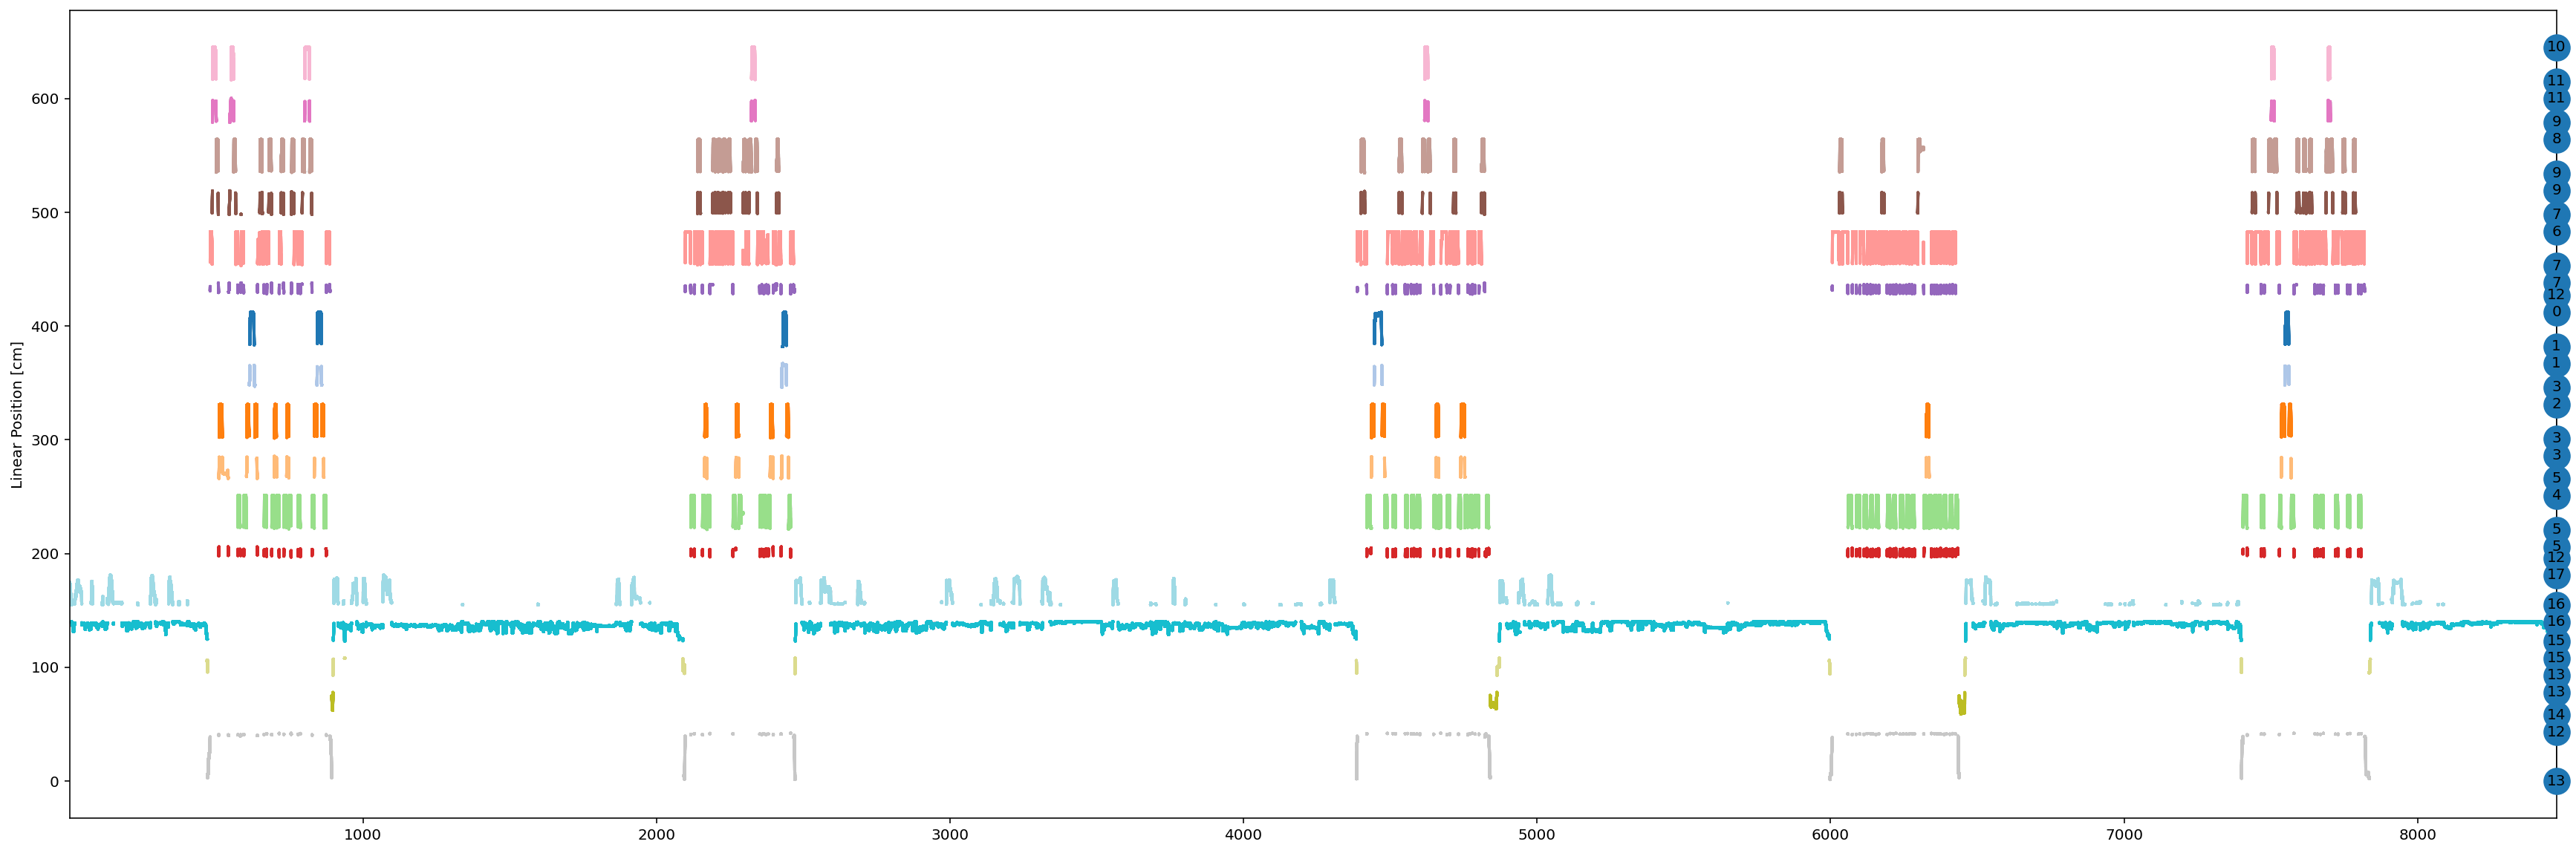

In [112]:
plt.figure(figsize=(30, 10))

plt.scatter(
    position_info.index / np.timedelta64(1, "s"),
    position_info.linear_position,
    c=position_info.track_segment_id,
    cmap="tab20",
    s=1,
)
plot_graph_as_1D(
    track_graph,
    EDGE_ORDER,
    EDGE_SPACING,
    axis="y",
    other_axis_start=position_info.index[-1] / np.timedelta64(1, "s"),
)
plt.xlim(
    (
        position_info.index[0] / np.timedelta64(1, "s"),
        position_info.index[-1] / np.timedelta64(1, "s"),
    )
)

In [137]:
from loren_frank_data_processing import get_all_multiunit_indicators

from loren_frank_data_processing.tetrodes import (
    get_tetrode_info_path,
    loadmat,
    convert_tetrode_epoch_to_dataframe,
)


def make_tetrode_dataframe(animals):
    animal, day, epoch = epoch_key
    file_name = get_tetrode_info_path(animals[animal])
    tet_info = loadmat(file_name, squeeze_me=True)["tetinfo"]
    return convert_tetrode_epoch_to_dataframe(tet_info, epoch_key)


tetrode_info = make_tetrode_dataframe(ANIMALS)
is_brain_areas = tetrode_info.area.str.upper().isin(["CA1"])
tetrode_keys = tetrode_info.loc[is_brain_areas].index


def _time_function(*args, **kwargs):
    return position_info.index


multiunits = get_all_multiunit_indicators(tetrode_keys, ANIMALS, _time_function)

In [138]:
multiunits

<xarray.DataArray (time: 4236156, features: 4, tetrodes: 25)>
array([[[272.,  13.,  nan, ..., 123.,  nan,  nan],
        [108.,  35.,  nan, ..., 128.,  nan,  nan],
        [190.,  69.,  nan, ..., 128.,  nan,  nan],
        [218., 121.,  nan, ..., 128.,  nan,  nan]],

       [[ nan,  75.,  78., ..., 106.,  nan,  nan],
        [ nan,  72.,  60., ..., 115.,  nan,  nan],
        [ nan,  63.,  84., ..., 115.,  nan,  nan],
        [ nan,  66.,  63., ..., 105.,  nan,  nan]],

       [[141., 110., 115., ..., 173.,  nan,  nan],
        [134., 118., 128., ..., 183.,  nan,  nan],
        [145., 117., 150., ..., 183.,  nan,  nan],
        [137., 144., 106., ..., 175.,  nan,  nan]],

       ...,

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]])
Coordinates:
  * time      (time) timedelta64[ns] 00:00:00.743733333 ... 02:21:13.053733333
  * features  (features) <U13 'channel_1_max' ... 'channel_4_max'
Dimensions without coordinates: tetrodes

In [140]:
from src.load_data import load_data

data = load_data(epoch_key)

In [141]:
data

{'position_info':                            x_position  y_position  head_direction      speed  \
 time                                                                           
 0 days 00:00:00.743733333  136.803980  109.544717             NaN   1.859527   
 0 days 00:00:00.745733333  136.803419  109.543413             NaN   1.957079   
 0 days 00:00:00.747733333  136.802858  109.542109             NaN   2.054632   
 0 days 00:00:00.749733333  136.802296  109.540805             NaN   2.152184   
 0 days 00:00:00.751733333  136.801735  109.539501             NaN   2.249737   
 ...                               ...         ...             ...        ...   
 0 days 02:21:13.045733333  121.469288  108.493322             NaN  55.256967   
 0 days 02:21:13.047733333  121.519268  108.399049             NaN  55.335842   
 0 days 02:21:13.049733333  121.569248  108.304776             NaN  55.414718   
 0 days 02:21:13.051733333  121.619229  108.210504             NaN  55.493594   
 0 days 02: